# 4. Trimming raw files

In [4]:
# Load packages - remember to open rstudio through conda, after activating microbiota-nanopore environment
library(ShortRead)
library(dada2)
library(tidyverse)

In [22]:
# Defining parameters for trimminging and filtering
minLength <- 1200 #Removes reads shorter than this length. Minimum length is enforced AFTER trimming
maxLength <- 1800 #Removes reads longer than this length. Maximum length is enforced BEFORE trimming 
trimLeft <- 100 #The number of nucleotides to remove from the start of each read. Must cover the primer length
trimRight <- 100 #The number of nucleotides to remove from the end of each read. Must cover the primer length

In [12]:
# Handling the files
path <- setwd("/home/strawberry/Documents/Collaborations/sinusite_edwin/data/raw_data/concatenated")
files <- list.files(pattern = ".fastq") # create object for files based on patter 
files

[1] "0001967K_T1.fastq"   "0001967K_T3.fastq"   "0001967K_T6.fastq"  
  [4] "0018303G_T0.fastq"   "0088303G_T0.fastq"   "0088303G_T1.fastq"  
  [7] "0088303G_T3.fastq"   "0110059G_T0.fastq"   "0110059G_T1.fastq"  
 [10] "0110059G_T12.fastq"  "0110059G_T3.fastq"   "0110059G_T6.fastq"  
 [13] "0120695B_T0.fastq"   "0130765A_T0.fastq"   "0130765A_T1.fastq"  
 [16] "0130765A_T12.fastq"  "0130765A_T3.fastq"   "0130765A_T6.fastq"  
 [19] "0207720E_T0.fastq"   "0207720E_T1.fastq"   "0207720E_T12.fastq" 
 [22] "0207720E_T3.fastq"   "0236549G_T0.fastq"   "0236549G_T12.fastq" 
 [25] "0236549G_T3.fastq"   "0236549G_T6.fastq"   "0313863D_T0.fastq"  
 [28] "0313863D_T1.fastq"   "0313863D_T12.fastq"  "0313863D_T3.fastq"  
 [31] "0332596H_PreC.fastq" "0332596H_T1.fastq"   "0332596H_T6.fastq"  
 [34] "0358613K_T0.fastq"   "0358613K_T1.fastq"   "0358613K_T3.fastq"  
 [37] "0358613K_T6.fastq"   "0492882D_T0.fastq"   "0492882D_T1.fastq"  
 [40] "0492882D_T12.fastq"  "0492882D_T3.fastq"   "0492882D_T6.fastq"  
 [43] "0514164A_T0.fastq"   "0514164A_T1.fastq"   "0514164A_T3.fastq"  
 [46] "0514164A_T6.fastq"   "0518952I_T0.fastq"   "0561785J_T0.fastq"  
 [49] "0584352K_T0.fastq"   "0584352K_T1.fastq"   "0584352K_T3.fastq"  
 [52] "0584352K_T6.fastq"   "0689227I_T0.fastq"   "0689227I_T1.fastq"  
 [55] "0689227I_T12.fastq"  "0689227I_T3.fastq"   "0689227I_T6.fastq"  
 [58] "0732163H_T0.fastq"   "0732163H_T3.fastq"   "0732163H_T6.fastq"  
 [61] "0780068I_T0.fastq"   "0780068I_T12.fastq"  "0780068I_T3.fastq"  
 [64] "0780068I_T6.fastq"   "0784533E_T0.fastq"   "0784533E_T1.fastq"  
 [67] "0784533E_T3.fastq"   "0784533E_T6.fastq"   "0878122D_T0.fastq"  
 [70] "0878122D_T3.fastq"   "0878122D_T6.fastq"   "0928507A_T0.fastq"  
 [73] "0974256K_T0.fastq"   "0974256K_T1.fastq"   "0980601G_T0.fastq"  
 [76] "0980601G_T1.fastq"   "0980601G_T12.fastq"  "0980601G_T3.fastq"  
 [79] "0980601G_T6.fastq"   "0990961D_T0.fastq"   "0990961D_T1.fastq"  
 [82] "0990961D_T12.fastq"  "0990961D_T3.fastq"   "0990961D_T6.fastq"  
 [85] "1190552D_T0.fastq"   "1190552D_T12.fastq"  "1190552D_T3.fastq"  
 [88] "1272679D_T0.fastq"   "1272679D_T1.fastq"   "1272679D_T12.fastq" 
 [91] "1272679D_T3.fastq"   "1272679D_T6.fastq"   "1377897D_T0.fastq"  
 [94] "1377897D_T1.fastq"   "1377897D_T12.fastq"  "1377897D_T3.fastq"  
 [97] "1427495A_T0.fastq"   "1427495A_T12.fastq"  "1427495A_T3.fastq"  
[100] "1427495A_T6.fastq"   "1512536E_T0.fastq"   "1512536E_T1.fastq"  
[103] "1512536E_T12.fastq"  "1512536E_T3.fastq"   "1512536E_T6.fastq"  
[106] "1526680J_T1.fastq"   "1526680J_T12.fastq"  "1526680J_T3.fastq"  
[109] "1526680J_T6.fastq"   "1532317F_T0.fastq"   "1532317F_T12.fastq" 
[112] "1532317F_T3.fastq"   "1532317F_T6.fastq"   "1552332D_T0.fastq"  
[115] "1552332D_T1.fastq"   "1552332D_T12.fastq"  "1552332D_T3.fastq"  
[118] "1553248E_T0.fastq"   "1553248E_T1.fastq"   "1553248E_T3.fastq"  
[121] "1553248E_T6.fastq"   "1557602I_T0.fastq"   "1557602I_T1.fastq"  
[124] "1557602I_T3.fastq"   "1557602I_T6.fastq"   "1560534I_T0.fastq"  
[127] "1560534I_T1.fastq"   "1560534I_T12.fastq"  "1560534I_T3.fastq"  
[130] "1560534I_T6.fastq"   "1562839D_T0.fastq"   "1562839D_T12.fastq" 
[133] "1562839D_T3.fastq"   "1562839D_T6.fastq"   "1567252D_T0.fastq"  
[136] "1567252D_T1.fastq"   "1567252D_T12.fastq"  "1567252D_T3.fastq"  
[139] "1567252D_T6.fastq"   "1571955H_T0.fastq"   "1571955H_T3.fastq"  
[142] "1578804D_T1.fastq"   "1578804D_T12.fastq"  "1578804D_T3.fastq"  
[145] "1578804D_T6.fastq"   "1605228B_T0.fastq"   "1605228B_T1.fastq"  
[148] "1605228B_T12.fastq"  "1605228B_T3.fastq"   "1605228B_T6.fastq"  
[151] "1613180K_T0.fastq"   "1613180K_T1.fastq"   "1618827B_T0.fastq"  
[154] "1618827B_T1.fastq"   "1618827B_T3.fastq"   "1628845C_T1.fastq"  
[157] "1628845C_T3.fastq"   "1628845C_T6.fastq"   "1645117H_T0.fastq"  
[160] "1645117H_T1.fastq"   "1649434F_T0.fastq"   "16544702B_T3.fastq" 
[163] "1654702B_T0.fastq"   "1654702B_T1.fastq"   "1654702B_T6.fastq"  
[166] "1668337K_T0.fastq"   "1668337K_T1.f

In [23]:
sample.names <- tools::file_path_sans_ext(basename(files))  # remove extension
rawFiles <- sort(list.files(path, pattern=".fastq", full.names = TRUE))
filtFiles <- file.path(path, "filtered", paste0(sample.names, "_filt.fastq"))

In [24]:
# Sending filtered files to output directory
### I've previously created a 'filtered' directory, inside raw_data dir, to store these results
out <- filterAndTrim(rawFiles, filtFiles, trimLeft = trimLeft, 
                     trimRight = trimRight, maxLen = maxLength, 
                     minLen = minLength,  truncQ = 0, 
                     compress = FALSE)
out
write.table(out, file = "read_count_QC.txt", sep = "\t", row.names = TRUE)

Creating output directory: /home/strawberry/Documents/Collaborations/sinusite_edwin/data/raw_data/concatenated/filtered



,reads.in,reads.out
0001967K_T1.fastq,1061,998
0001967K_T3.fastq,20860,15319
0001967K_T6.fastq,48290,44529
0018303G_T0.fastq,25719,23832
0088303G_T0.fastq,9051,8128
0088303G_T1.fastq,11707,9631
0088303G_T3.fastq,3587,3134
0110059G_T0.fastq,4792,4303
0110059G_T1.fastq,367,140
0110059G_T12.fastq,828,210


In [1]:
## Check how many files have a lower number of reads (<1000)
out_df <- as.data.frame(out) # convert this matrix to a df

## Count the number of samples with reads.out < 1000
low_reads_count <- sum(out_df$reads.out < 1000)

## Count the number of samples with reads.out >= 1100
high_reads_count <- sum(out_df$reads.out >= 1000)

## Create a named vector for the pie chart
reads_distribution <- c("Low Reads (<1000)" = low_reads_count, "High Reads (>=1000)" = high_reads_count)

## Create labels with absolute counts
labels <- paste(names(reads_distribution), "\n", reads_distribution)

## Set the output file as PNG
png("reads_distribution_pie_chart.png", width = 800, height = 600)

## Plot the pie chart
pie(reads_distribution, 
    main = "Read Count Distribution After Filtering", 
    col = c("lightred", "lightgreen"), 
    labels = labels)

## Close the PNG device to save the plot
dev.off()

cat("Pie chart saved as 'reads_distribution_pie_chart.png'!\n")

ERROR: Error: object 'out' not found


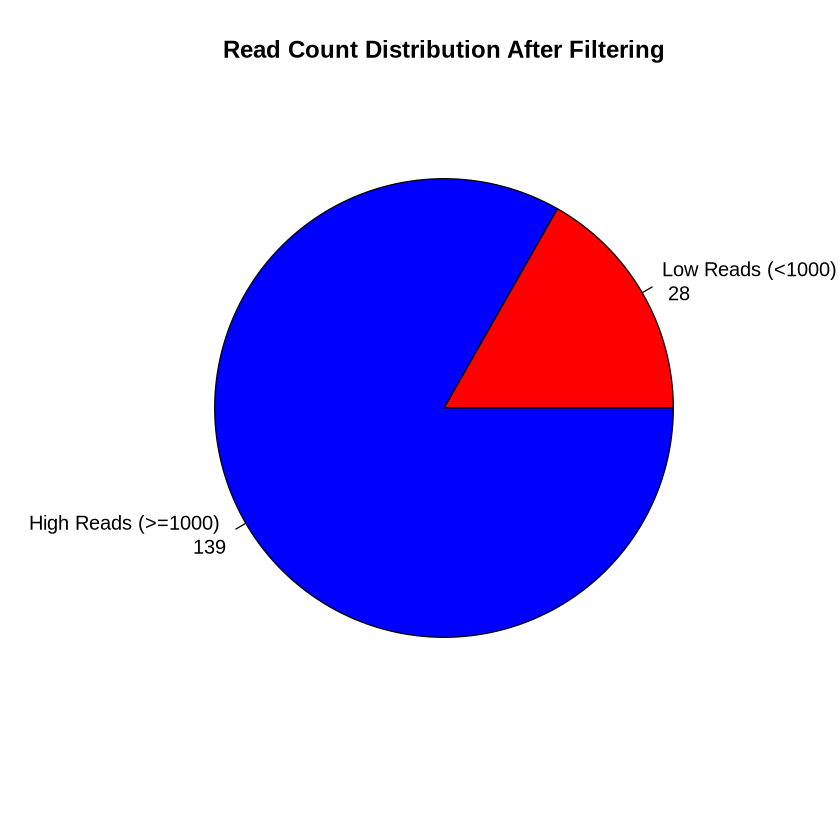

In [26]:
pie(reads_distribution, 
    main = "Read Count Distribution After Filtering", 
    col = c("red", "blue"), 
    labels = labels)